In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps


# Задание 1

In [2]:
def hilbert(n):
  x = np.arange(1, n+1) + np.arange(0, n)[:, np.newaxis]
  return 1/x

print(hilbert(5))

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


In [3]:
u, s, v = np.linalg.svd(hilbert(5))
print(*s)

1.5670506910982314 0.20853421861101337 0.011407491623419799 0.0003058980401511861 3.2879287721716932e-06


In [4]:
b_8 = np.zeros(8)
b_8[0] = 1
H_8 = hilbert(8)
print(np.linalg.solve(H_8, b_8), " - встроенный метод")

# решим TSVD
u, s, vh = np.linalg.svd(H_8)
eps = 1e-8
r = np.sum(s > eps)
print(r, "- порядок усечения")
s_8 = s[:r]
u_8 = u[:, :r]
vh_8 = vh[:r, :]

x_8 = (vh.T @ np.diag(1/s) @ u.T) @ b_8
x_8_tsvd = (vh_8.T @ np.diag(1/s_8) @ u_8.T) @ b_8
print(x_8, " - полный метод")
print(x_8_tsvd, " - усеченный метод")
print(np.linalg.norm(x_8 - x_8_tsvd), " - норма TSVS и обычного решения")

# добавим добавку
u_8_add = u[:, r:]
vh_8_add = vh[r:, :]
c_add = u_8_add.T @ H_8 @ vh_8_add.T
b_8_add = u_8_add.T @ b_8
z_add = np.linalg.solve(c_add, b_8_add)
x_add = vh_8_add.T @ z_add

print(x_8_tsvd + x_add, " - с добавкой")
print(np.linalg.norm(x_8 - x_8_tsvd - x_add), " - норма TSVD с добавкой и решения")




[ 6.40000013e+01 -2.01600006e+03  2.01600008e+04 -9.24000041e+04
  2.21760011e+05 -2.88288015e+05  1.92192010e+05 -5.14800029e+04]  - встроенный метод
7 - порядок усечения
[ 6.40000000e+01 -2.01600000e+03  2.01600000e+04 -9.23999999e+04
  2.21760000e+05 -2.88287999e+05  1.92191999e+05 -5.14799998e+04]  - полный метод
[    43.99599289   -940.76465378   6087.22658646 -16094.98930291
  15992.70286759   3271.43405364 -15546.76108272   7193.95533925]  - усеченный метод
424224.8969482116  - норма TSVS и обычного решения
[ 6.40000004e+01 -2.01600002e+03  2.01600002e+04 -9.24000012e+04
  2.21760003e+05 -2.88288004e+05  1.92192003e+05 -5.14800008e+04]  - с добавкой
0.007456925270384918  - норма TSVD с добавкой и решения


**Видим, что если использовать TSVD на гильбертовой матрице, то решение значительно отличается от правильного**  
Мы также убедились что с добавкой решение возвращается к изначальному (с погрешностью округления)

In [5]:
b_10 = np.zeros(10)
b_10[0] = 1
H_10 = hilbert(10)
print(np.linalg.solve(H_10, b_10), " - встроенный метод")

u, s, vh = np.linalg.svd(H_10)
eps = 1e-8
r = np.sum(s > eps)
print(r, "- порядок усечения")
s_10 = s[:r]
u_10 = u[:, :r]
vh_10 = vh[:r, :]

x_10 = (vh.T @ np.diag(1/s) @ u.T) @ b_10
x_10_tsvd = (vh_10.T @ np.diag(1/s_10) @ u_10.T) @ b_10
print(x_10, " - полный метод")
print(x_10_tsvd, " - усеченный метод")
print(np.linalg.norm(x_10 - x_10_tsvd), " - норма разности решений")


# добавим добавку
u_10_add = u[:, r:]
vh_10_add = vh[r:, :]
c_add = u_10_add.T @ H_10 @ vh_10_add.T
b_10_add = u_10_add.T @ b_10
z_add = np.linalg.solve(c_add, b_10_add)
x_add = vh_10_add.T @ z_add

print(x_10_tsvd + x_add, " - с добавкой")
print(np.linalg.norm(x_10 - x_10_tsvd - x_add), " - норма TSVD с добавкой и решения")

[ 9.99994494e+01 -4.94995167e+03  7.91989588e+04 -6.00590451e+05
  2.52247413e+06 -6.30617316e+06  9.60939088e+06 -8.75139707e+06
  4.37569308e+06 -9.23756412e+05]  - встроенный метод
7 - порядок усечения
[ 9.99968864e+01 -4.94973061e+03  7.91942572e+04 -6.00547762e+05
  2.52227074e+06 -6.30561458e+06  9.60847522e+06 -8.75051288e+06
  4.37522921e+06 -9.23654467e+05]  - полный метод
[   37.19542075  -665.08496775  3429.5518983  -6275.88330729
  1734.56259276  4319.93524724   714.74715541 -3306.84170314
 -3182.02965972  3200.39524876]  - усеченный метод
15342083.09086296  - норма разности решений
[ 9.99977742e+01 -4.94980687e+03  7.91958742e+04 -6.00562412e+05
  2.52234042e+06 -6.30580568e+06  9.60878814e+06 -8.75081477e+06
  4.37538747e+06 -9.23689225e+05]  - с добавкой
506.85639906895614  - норма TSVD с добавкой и решения


**Видим, что различие между TSVD и обычным решением стала ещё больше, чем с $H(8)$**

# Задание 2

In [47]:
def random_from_cov(cov):
  n = cov.shape[0]
  a = np.linalg.cholesky(cov)
  # print(a)
  z = sps.norm.rvs(size=n)
  # print(z)
  return a @ z


In [64]:
# проверка 

cov = np.array([[1, 0.2, 0.7], [0.2, 1, 0.2], [0.7, 0.2, 1]])
print(random_from_cov(cov))

vals = random_from_cov(cov)
for i in range(999):
  vals = np.vstack((vals, random_from_cov(cov)))

np.cov(vals.T)

[ 0.20988836  1.19598562 -0.26745531]


array([[1.01654794, 0.16469328, 0.72466442],
       [0.16469328, 0.96147203, 0.16572841],
       [0.72466442, 0.16572841, 1.02602784]])

Видим, что полученная матрица ковариции близка к изначальной, а значит метод работает.

# Задание 3

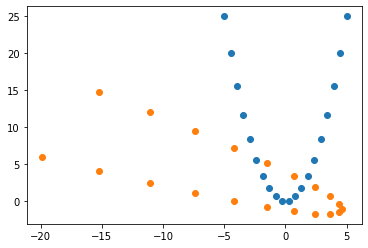

In [3]:
# создаём множества точек
x = np.linspace(-5, 5, 20)
y = x ** 2
X_0 = np.vstack((x,y))

phi = np.pi * 0.345
rot = np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi), np.cos(phi)]])
trans = np.array([[4.56], [-1.33]])

X_1 = rot @ X_0 + trans

plt.scatter(X_0[0, :], X_0[1, :])
plt.scatter(X_1[0, :], X_1[1, :])

[-1.77635684e-16  9.21052632e+00] [-3.57994659  2.97987987]
Вектор трансляции найден правильно: True 
Матрица поворота найдена правильно True


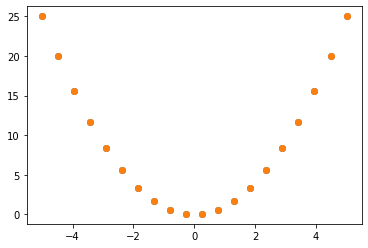

In [90]:
# решаем задачу

x_0 = np.mean(X_0, axis=1)
x_1 = np.mean(X_1, axis=1)
    
print(x_0, x_1)

Xc_0 = X_0 - x_0.reshape(-1, 1) @ np.ones((1, 20))
Xc_1 = X_1 - x_1.reshape(-1, 1) @ np.ones((1, 20))
u, s, vh = np.linalg.svd(Xc_0 @ Xc_1.T)
R = u @ vh
mu = x_1.reshape(-1, 1) - R.T @ x_0.reshape(-1, 1)
Xr = R @ (X_1 - mu)
Xrt = Xr 
plt.scatter(Xrt[0, :], Xrt[1, :])
plt.scatter(X_0[0, :], X_0[1, :])

print("Вектор трансляции найден правильно:", np.allclose(mu, trans),"\nМатрица поворота найдена правильно", np.allclose(R.T, rot))


**Видим, что параболы идеально наложились друг на друга**  
Теперь добавим шумы в изначльные данные

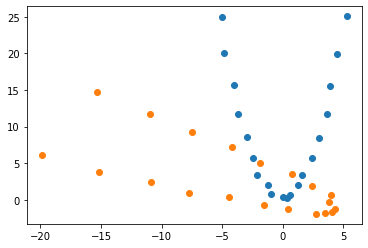

In [76]:
Xn_0 = X_0 + sps.norm.rvs(size=(2, 20), scale=0.2)
Xn_1 = X_1 + sps.norm.rvs(size=(2, 20), scale=0.2)

plt.scatter(Xn_0[0], Xn_0[1])
plt.scatter(Xn_1[0], Xn_1[1])

[-0.02902136  9.30247459] [-3.67389343  2.91682259]
Норма разности векторов трансляции: 0.06369117416960592 
Норма разности матриц поворота: 0.003011923642528982


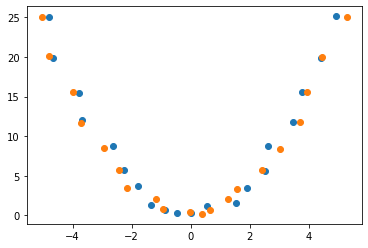

In [91]:
x_0 = np.mean(Xn_0, axis=1)
x_1 = np.mean(Xn_1, axis=1)
    
print(x_0, x_1)

Xc_0 = Xn_0 - x_0.reshape(-1, 1) @ np.ones((1, 20))
Xc_1 = Xn_1 - x_1.reshape(-1, 1) @ np.ones((1, 20))
u, s, vh = np.linalg.svd(Xc_0 @ Xc_1.T)
R = u @ vh
mu = x_1.reshape(-1, 1) - R.T @ x_0.reshape(-1, 1)
Xr = R @ (Xn_1 - mu)
Xrt = Xr 
plt.scatter(Xrt[0, :], Xrt[1, :])
plt.scatter(Xn_0[0, :], Xn_0[1, :])

print("Норма разности векторов трансляции:", np.linalg.norm(mu - trans),"\nНорма разности матриц поворота:", np.linalg.norm(R.T - rot))


**Видим, что метод работает хорошо для данных с шумами**  
Теперь испытаем метод на двух разных формах

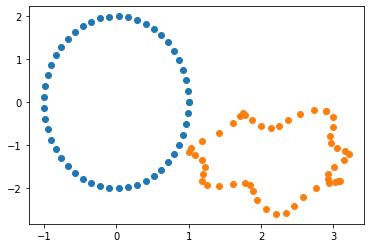

In [112]:
phi = np.linspace(0, 2*np.pi, 50)
xs_0 = np.cos(phi)
ys_0 = np.sin(phi) * 2
xs_1 = (1 + 0.3 * np.cos(5 * phi) * np.cos(2 * phi) ) * np.cos(phi + 1) + 2.2
ys_1 = (1 + 0.3 * np.cos(5 * phi)) * np.sin(phi + 1) - 1.3

Xs_0 = np.vstack((xs_0, ys_0))
Xs_1 = np.vstack((xs_1, ys_1))

plt.scatter(Xs_0[0], Xs_0[1])
plt.scatter(Xs_1[0], Xs_1[1])

[ 2.00000000e-02 -2.53402967e-17] [ 2.21404786 -1.27812175]
Вектор трансляции
[[ 2.2026746 ]
 [-1.29457317]]
Матрица поворота:
[[ 0.56866284  0.82257071]
 [-0.82257071  0.56866284]]


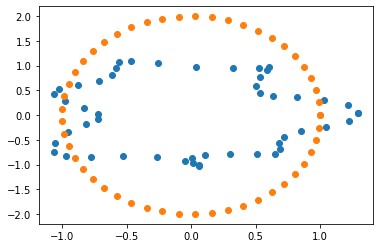

In [115]:
x_0 = np.mean(Xs_0, axis=1)
x_1 = np.mean(Xs_1, axis=1)
    
print(x_0, x_1)

Xc_0 = Xn_0 - x_0.reshape(-1, 1) @ np.ones((1, 20))
Xc_1 = Xn_1 - x_1.reshape(-1, 1) @ np.ones((1, 20))
u, s, vh = np.linalg.svd(Xs_0 @ Xs_1.T)
R = u @ vh
mu = x_1.reshape(-1, 1) - R.T @ x_0.reshape(-1, 1)
Xr = R @ (Xs_1 - mu)
Xrt = Xr 
plt.scatter(Xrt[0, :], Xrt[1, :])
plt.scatter(Xs_0[0, :], Xs_0[1, :])

print("Вектор трансляции", mu ,"Матрица поворота:", R, sep='\n')


**Видим, что странная форма передвинулась ближе к эллипсу**

# Задание 5

In [116]:
C = np.array([[1, 0.9, 0.7],
              [0.9, 1, 0.4],
              [0.7, 0.4, 1]])

C_0 = np.array([[1, 0.9, 0.7],
                [0.9, 1, 0.3],
                [0.7, 0.3, 1]])

print("с.з. матрицы C:", np.linalg.eigvals(C))
print("с.з. матрицы C0:", np.linalg.eigvals(C_0))

с.з. матрицы C: [2.35363603 0.03034736 0.6160166 ]
с.з. матрицы C0: [ 2.29672779 -0.00735244  0.71062465]


In [136]:
def change_corr(x):
    vals, vects = np.linalg.eig(x)
    vals[vals < 0] = 0
    B = vects * vals.reshape(1, -1)
    B = B / np.linalg.norm(B, axis=1).reshape(-1, 1)
    x_new = B @ B.T
    return x_new
    
print(change_corr(C_0))

[[1.         0.96153494 0.87605522]
 [0.96153494 1.         0.70990276]
 [0.87605522 0.70990276 1.        ]]
